## Introdução

Este notebook tem como objetivo criar um modelo que detecte movimentações fraudulentas em cartões de crédito. É importante que as companhias saibam reconhecer fraudes para que os clientes não sejam cobrados por itens que eles não compraram.
Para essa finalidade, o dataset disponível em https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud foi explorado, tratado e utilizado para treinar um modelo de classificação de machine learning.
A base de dados conta com 28 variáveis anonimizadas que passaram por uma transformação PCA, tempo e quantia relacionadas à cartões de crédito de clientes europeus durante dois dias em 2013. 

## Sumário
* <a href='#exploracao'> Exploração dos dados </a>
* <a href='#tratamento'> Tratamento dos dados </a>
    * <a href='#escala'> Normalização </a>
    * <a href='#balanceamento'> Balanceamento </a>
    * <a href='#correlacao'> Correlação </a>
    * <a href='#outliers'> Outliers </a>
* <a href='#modelo'> Modelagem </a>
* <a href='#resultados'> Métricas e resultados </a>
    * <a href='#calibracao'> Calibração</a>
    * <a href='#performance'> Performance</a>
    * <a href='#smote'> SMOTE</a>
    * <a href='#conclusao'> Conclusão </a>

<a id='exploracao'></a>
## Exploração dos dados
Nesta seção abrimos o arquivo .csv com os dados de transação e verificamos algumas estatísticas (valores máximos e mínimos, médias), nomes das colunas, se há valores vazios para tratamento e qual a porcentagem de fraude neste dataset

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('creditcard.csv')

In [2]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
print("Número de dados faltantes: ",data.isnull().sum().sum() )

Número de dados faltantes:  0


In [4]:
zero_trans=data.Amount.loc[data.Amount==0].count()
len_dataset = data.Class.count()
num_fraud = data.Class.sum()
zero_fraud = data.Amount.loc[(data.Amount==0) & (data.Class==1)].count()
print("Número de transações com valor 0: {}, isso representa {:.2f}% do dataset".format(zero_trans,zero_trans/len_dataset*100 ))
print("Dessas, {} transações eram fraude, isso representa {:.2f}% das fraudes".format(zero_fraud, zero_fraud/num_fraud*100))

Número de transações com valor 0: 1825, isso representa 0.64% do dataset
Dessas, 27 transações eram fraude, isso representa 5.49% das fraudes


As transações com valor 0 podem ser a validação de um cartão, para saber se está ativo. Não parece ser relevante no dataset e, suprimindo ou substituindo esses valores, pode-se perder informação. Por isso opto por manter as transações de valor 0.

In [5]:
perc_fraud = num_fraud/len_dataset
print("Número de fraudes: {}, isso representa {:2f}% do dataset".format(num_fraud, perc_fraud*100))

Número de fraudes: 492, isso representa 0.172749% do dataset


<a id='tratamento'></a>
## Tratamento dos dados

### Ciclo de tempo
Tratando coluna de tempo: ela é contada em segundos, então preciso colocá-la em ciclos. Time/3600 = horas passadas (pegar sem decimal). Para colocar em ciclo do dia, a hora é o resto da divisão por 24h

In [6]:
data["TimeHour"] = round(data.Time/3600)%24

<a id='escala'></a>
### Normalização
Nesta subseção corrijo a escala das colunas "Amount" e "Time" já que são as únicas variáveis que não passaram por tratamento antecedente e essa diferença de grandeza entre os parâmetros interfere no treinamento do modelo. Dessa forma, o método visa tornar a média dos valores igual a 0 sem perder informação dos dados.

In [7]:
from sklearn.preprocessing import RobustScaler

data_scaled = data.copy()
scaler = RobustScaler()

data_scaled['VAmount'] = scaler.fit_transform(np.array(data['Amount']).reshape(-1, 1))
data_scaled['VTime'] = scaler.fit_transform(np.array(data['Time']).reshape(-1, 1))
data_scaled['VTimeHour'] = scaler.fit_transform(np.array(data['TimeHour']).reshape(-1, 1))

#data_scaled = data_scaled.drop(columns=['Time','Amount'])
data_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,TimeHour,VAmount,VTime,VTimeHour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,1.783274,-0.994983,-1.666667
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,-0.269825,-0.994983,-1.666667
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,4.983721,-0.994972,-1.666667
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,1.418291,-0.994972,-1.666667
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.670579,-0.994960,-1.666667


<a id='balanceamento'></a>
### Balanceamento
Uma característica evidente deste dataset é o desbalanceamento. Como vimos, menos de 0.2% dos dados são fraude. Com uma amostra tão pequena em relação ao geral, o modelo fará um overfitting da classe majoritária (não-fraude). Então uso a técnica de random undersampling na amostra de treino para que o modelo seja balanceado.

A fim de aumentar o número de amostras, uma proporção ótima foi escolhida, sem prejudicar de forma relevante o balanceamento do modelo


In [8]:
def under_samp(X_train, y_train, prop):
    
    train_data = X_train.copy()
    train_data.loc[:,("Class")] = y_train.copy()
    n_fraud = int(y_train.sum()) #afinal aqui voltam 1 ou 2 argumentos?
    
    fraud = train_data[train_data.Class == 1]
    not_fraud = train_data[train_data.Class == 0]
    
    not_fraud = not_fraud.sample(int(n_fraud*prop), random_state=0)

    undersampled = pd.concat([fraud, not_fraud], axis=0)
    
    return undersampled

In [9]:
# Separando amostras de treino e teste
from sklearn.model_selection import train_test_split

train_data, test_data, train_y, test_y = train_test_split(data_scaled.drop(columns=['Class']), data_scaled.Class,
                                                          random_state=0)

# Sub sample para dados de treino
prop_undersmp = 1.2
undersampled_train = under_samp(train_data, train_y, prop_undersmp)

# Conferindo número de casos
n_samples = pd.DataFrame(undersampled_train.Class.value_counts())
n_samples["Classe"] = ["Não Fraude", "Fraude"]
n_samples.rename(columns={"Class": "Número de casos"}, inplace=True)
n_samples

,Número de casos,Classe
0,446,Não Fraude
1,372,Fraude


<a id='correlacao'></a>
### Correlação
Com um dataset balanceado, é possível identificar com mais clareza os paramêtros que apresentam uma correlação - não necessariamente linear, por isso o uso do método Spearman - com o que se deseja prever: a classe (fraude ou não fraude). Assim escolhi as variáveis (features) que são mais influentes para treinar o modelo, pois outras variáveis não relacionadas podem ter uma influência negativa no resultado.

In [ ]:
import shap
from sklearn.tree import DecisionTreeClassifier # (ou RandomForest?)
tree_model = DecisionTreeClassifier()

tree_model.fit(clean_train.drop(columns=['Class']), clean_train['Class'])
explainer = shap.Explainer(tree_model.predict, test_data)

Text(0.5, 1.0, 'Correlação entre os parâmetros')

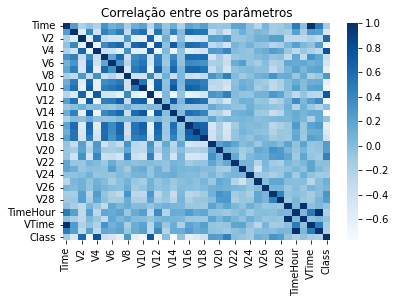

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = undersampled_train.corr(method='spearman')

sns.heatmap(df_corr, cmap='Blues')
plt.title("Correlação entre os parâmetros")

In [11]:
# Filtrando as melhores variáveis com um threshold

thr_corr = 0.7

best_feats = df_corr[abs(df_corr.Class) > thr_corr].index

best_feats = best_feats[:len(best_feats)-1]
best_feats

Index(['V3', 'V4', 'V10', 'V11', 'V12', 'V14'], dtype='object')

<a id='modelo'></a>
## Modelagem
Nesta seção, comparo mais de um modelo de classificação usando os seguintes parâmetros:
* Recall e precisão sobre a amostra de treino calculados pela validação cruzada, a fim de evitar overfitting e evitar obter resultados enviesados, com a seguinte interpretação:
    * Recall (ou sensibilidade): a razão de todas as fraudes detectadas em relação às fraudes que existiam
    * Precisão: razão entre o número de fraudes corretamente detectadas em relação à todas as fraudes previstas pelo modelo
* F1 Score, calculado a partir da precisão e do recall, sendo a média harmônica entre os dois e fornecendo assim uma métrica única contendo as duas informações para escolha do modelo

In [15]:
clean_train = undersampled_train.copy()

# Amostra de treinamento com undersampling
X_train = clean_train[best_feats]
y_train = clean_train["Class"]

# Amostra de treinamento sem undersampling
X = train_data[best_feats]
y = train_y

# Amostra de teste
X_test = test_data[best_feats]
y_test = test_y

In [16]:
from sklearn.model_selection import cross_val_score
import time

def undersmp_scores(model, X_train, y_train):
    start = time.time()
    recall = np.mean(cross_val_score(model, X_train, y_train, scoring='recall'))
    precision = np.mean(cross_val_score(model, X_train, y_train, scoring='precision'))
    f1 = 2 * (precision * recall) / (precision + recall)
    end = time.time()
    return recall, precision, f1 ,end-start

In [17]:
from xgboost import XGBClassifier, XGBRegressor

# xgb_params = {}
# xgb_params["objective"] = 'reg:logistic'
# xgb_params["random_state"] = 0





In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models_names = ["Regressão Logísitca","Random Forest","XGBoost"]

models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0), XGBClassifier(random_state=0)]

comparing_model = pd.DataFrame({"Modelo":[], "Tempo (s)": [], "Recall Score":[],
                              "Precision Score":[],"F1 Score": []})

for model_name,model in zip(models_names, models):
    
    recall, precision, f1, calc_time = undersmp_scores(model, X_train, y_train)

    df_scores = pd.DataFrame({"Modelo":model_name, "Tempo (s)": calc_time, "Recall Score":recall,
                              "Precision Score":precision,"F1 Score": f1}, index=[0])
    
    comparing_model = pd.concat([comparing_model, df_scores],axis=0)
    
comparing_model

,Modelo,Tempo (s),Recall Score,Precision Score,F1 Score
0,Regressão Logísitca,0.095565,0.895243,0.973981,0.932954
0,K Nearest Neighbors(KNN),0.080375,0.892577,0.982468,0.935368
0,Árvore de Decisão,0.062629,0.914018,0.890183,0.901943
0,Random Forest,1.184970,0.905982,0.974392,0.938943
0,Support Vector Machine(SVC),0.728776,0.876432,0.988188,0.928961
0,XGBoost,1.752709,0.919351,0.953130,0.935936


O resultado mostra indícios de que o melhor classificador será o Random Forest. Faremos a comprovação sobre a amostra teste.

<a id='resultados'></a>
## Métricas e resultados

Com a amostra de teste, reforço a escolha do modelo de Random Forest através do cáculo da área soba curva de precision-recall (Area Under the Precision-Recall Curve - PR AUC) e demonstração da curva. Essa é uma métrica que foca nas razões de detecção da classe minoritária para diferentes valores de corte (threshold) da probabilidade prevista. Quanto mais próxima de um classificador ideal (PR AUC = 1), melhor.


Além disso, nessa última seção discuto o balanceamento do modelo, mostrando a relevância do tratamento de Undersampling justificado pela métrica de Brier Score. Por fim, demonstro a performance do modelo escolhido em termos de "bloqueio de transação".

In [19]:
### Treinando os modelos e guardando os resultados

all_probas = {"Modelo": [], "y_proba": []}

for model_name, model in zip(models_names, models):
    
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)
    
    all_probas["Modelo"].append(model_name)
    all_probas["y_proba"].append(y_proba[:,1])


Text(0.5, 1.0, 'PR Curve')

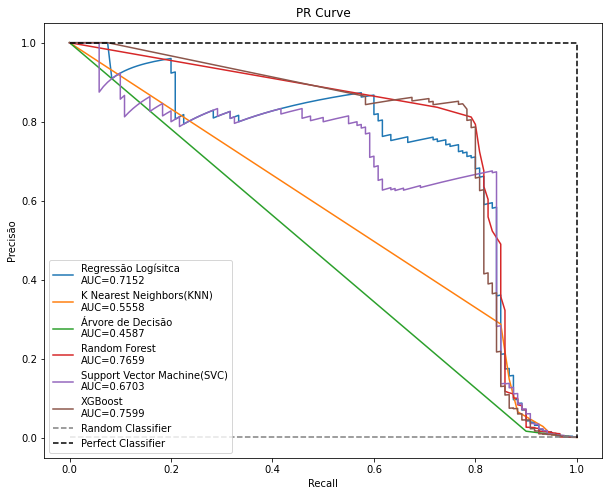

In [20]:
### AUC PRC
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(10,8))

for model_name, y_proba in zip(all_probas["Modelo"], all_probas["y_proba"]):
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    label = model_name+"\nAUC={:.4f}".format(pr_auc)
    plt.plot(recall,precision, label=label)

    
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], '--', color='gray', label='Random Classifier')
plt.plot([0,1,1],[1,1,0],'--', color='black', label="Perfect Classifier")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.legend()
plt.title("PR Curve")

<a id='calibracao'></a>
### Calibração
Para identificar o desbalanceamento do modelo, uso a métrica do Brier Score estratificado, que representa o erro quadrático médio de cada previsão em cada uma das classes. Quanto maior a diferença entre o Brier Score de cada classe, mais desbalanceado está o modelo.

Antes, faço uma busca exaustiva pelos parâmetros do modelo usando o GridSearchCV na intenção de obter uma leve melhora na perfomance do modelo.

In [37]:
# Melhores parâmetros pro XGBoost


params = {
    "colsample_bytree": [0.3, 0.5, 0.7],
    "gamma": [0, 0.25, 0.5],
    "learning_rate": [0.03, 0.1 , 0.3], # default 0.1 
    "max_depth": [2,6], # default 3
    "subsample": [0.4, 0.6],
    "random_state": [0]
} #obs: aqui não dá pra colocar floats sem ser em lista, internamente ele usa range

grid_model = GridSearchCV(XGBClassifier(), params, scoring='f1')

print("fim do grid search")
grid_model.fit(X_train, y_train)

y_pred_undersmp = best_model.predict_proba(X_test)[:,1]

precision_undersmp, recall_undersmp, threshold_pr = precision_recall_curve(y_test, y_pred_undersmp)
pr_auc_undersmp = auc(recall_undersmp, precision_undersmp)

print("XGBoost")
print("PR AUC: ", pr_auc_undersmp)

fim do grid search
XGBoost
PR AUC:  0.7452328396363408


In [21]:
#Achando melhores parâmetros

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=0)
params = {"max_depth": list(range(1,4,1)), "min_samples_leaf": list(range(2,7,1)), 'random_state':[0]}

#model = LogisticRegression(random_state=0)
#params = {"C": [0.01,0.05,0.1,0.5,1,2,3],'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear'], 'random_state':[0]}

# model = XGBClassifier()
# params = {
#     "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7],
#     "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
#     "learning_rate": [0.03, 0.05, 0.1 , 0.3], # default 0.1 
#     "max_depth": range(2, 6,1), # default 3
#     "n_estimators": range(100, 150,10), # default 100
#     "subsample": [0.4, 0.5, 0.6],
#     "random_state": [0]
# }

grid_model = GridSearchCV(model, params, scoring='f1')
grid_model.fit(X_train, y_train)

best_model = grid_model.best_estimator_

# Com undersampling
y_pred_undersmp = best_model.predict_proba(X_test)[:,1]

# Sem undersampling
y_pred_ = best_model.fit(X, y).predict_proba(X_test)[:,1]



In [38]:
def stratified_brier_score(y_true, y_probs):
    fraud = ((y_probs[y_true==1] - 1)**2).mean()
    not_fraud = ((y_probs[y_true==0])**2).mean()
    
    return [fraud, not_fraud]

In [39]:
from sklearn.calibration import calibration_curve

# Com undersampling

precision_undersmp, recall_undersmp, threshold_pr = precision_recall_curve(y_test, y_pred_undersmp)
pr_auc_undersmp = auc(recall_undersmp, precision_undersmp)
brier_score_undersmp = stratified_brier_score(y_test, y_pred_undersmp)

# Sem undersampling

precision, recall, _ = precision_recall_curve(y_test, y_pred_)
pr_auc = auc(recall, precision)
brier_score = stratified_brier_score(y_test, y_pred_)

model_cal = pd.DataFrame({"Random Forest":["Undersampling", "Normal"], 
                          "PR AUC": [pr_auc_undersmp, pr_auc],
                         "Bier score (fraude)":[brier_score_undersmp[0],brier_score[0]], 
                          "Brier score (não-fraude)":[brier_score_undersmp[1],brier_score[1]]})

model_cal

,Random Forest,PR AUC,Bier score (fraude),Brier score (não-fraude)
0,Undersampling,0.745233,0.299608,0.000127
1,Normal,0.745233,0.299608,0.000127



<a id='performance'></a>
### Performance

Como a curva de PR é criada a partir de diferentes valores de corte, é possível encontrar um valor ótimo. Esse ponto será determinado a partir média harmônica entre os eixos, o que corresponde à calcular o F1 Score. Quanto maior o valor da média, melhor o compromisso entre precisão e sensibilidade (recall)

Usando esse valor de corte, teremos otimizado a perfomance do modelo de um ponto de vista estatístico, mas cabem discussões sobre a proporção de erros aceitáveis de um ponto de vista de negócios.

In [40]:
# convert to f score
fscore = (2 * precision_undersmp * recall_undersmp) / (precision_undersmp + recall_undersmp)

idx = np.argmax(fscore)

best_thr = round(threshold_pr[idx], ndigits=4)
best_f1 = round(fscore[idx], ndigits=4)
best_prec = round(precision_undersmp[idx], ndigits=4)
best_recall = round(recall_undersmp[idx], ndigits=4)

print('Melhor valor de corte: {}'.format(best_thr))
print("Isto é: se a probabilidade de ser fraude for maior que o valor de corte, será classificado como fraude")

Melhor valor de corte: 0.1432
Isto é: se a probabilidade de ser fraude for maior que o valor de corte, será classificado como fraude


As matrizes podem ser interpretadas da seguinte forma:

Para o valor de corte igual a 0.5000
60.83% das fraudes que ocorreram seriam detectadas por esse modelo            
0.02% das transações seriam bloqueadas injustamente(transações normais classificadas como fraude)

Para o valor de corte igual a 0.1432
79.17% das fraudes que ocorreram seriam detectadas por esse modelo            
0.03% das transações seriam bloqueadas injustamente(transações normais classificadas como fraude)



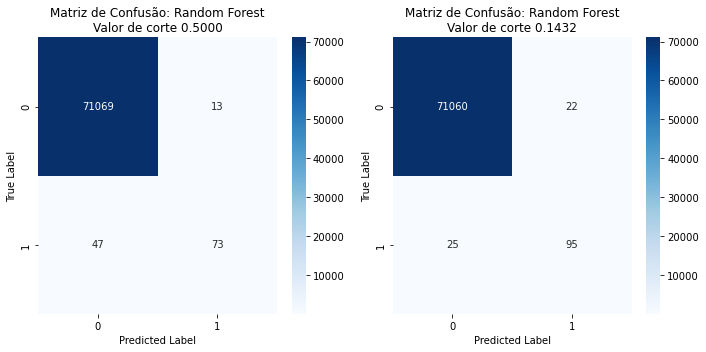

In [41]:
## Visualização gráfica
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

thresholds_list = [0.5, best_thr]

print('As matrizes podem ser interpretadas da seguinte forma:\n')

for thr,ax in zip(thresholds_list, axs.ravel()):
      y_pred = np.where(y_pred_undersmp > thr, 1, 0)
      
      cf_mtx = confusion_matrix(y_test,y_pred)
      
      tn, fp, fn, tp = cf_mtx.ravel()
      print("Para o valor de corte igual a {:.4f}".format(thr))
      print( '{:.2f}% das fraudes que ocorreram seriam detectadas por esse modelo\
            \n{:.2f}% das transações seriam bloqueadas injustamente(transações normais classificadas como fraude)\n'\
            .format(tp/(tp+fn)*100, fp/(fp+tn)*100) )
      
      cf_mtx = sns.heatmap(cf_mtx, cmap="Blues", annot = True, fmt='g', ax=ax)
      cf_mtx.set(xlabel="Predicted Label", ylabel ="True Label", title="Matriz de Confusão: Random Forest\nValor de corte {:.4f}".format(thr))

fig.tight_layout()
plt.show()



<a id='smote'></a>
### SMOTE
Por uma questão de tempo de processamento (e custo operacional), optei por evitar calcular os scores por validação cruzada com uma amostra tratada balanceada por Oversampling usando o método SMOTE.
Esse método cria dados sintéticos da classe minoritária (fraude) a partir dos valores da vizinhança, aumentando assim a base de treino com a mesma proporção para as duas classes.

Então, com a finalidade de analisar a perfomance e calibração do modelo, utilizarei uma amostra balanceada por oversampling diretamente no modelo escolhido prevendo a amostra de teste.

In [44]:
# Agora testando o modelo sobre uma base de treino com tratamento oversampled

# Oversampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state = 0)
X_oversmp, y_oversmp = smote.fit_resample(X, y) 

print("Dataset com {} linhas de transação, sendo {} fraudes e {} não fraudes".format(len(y_oversmp), sum(y_oversmp==1),
                                                                                    y_oversmp[y_oversmp==0].count()))

model = XGBClassifier(random_state=0)
#model = LogisticRegression(random_state=0)
#model = RandomForestClassifier(random_state=0)

# Treinando o modelo novamente
y_pred_oversmp_proba = model.fit(X_oversmp, y_oversmp).predict_proba(X_test)[:,1]
y_pred_oversmp = model.predict(X_test)
# Analisando resultados de predição do teste
precision, recall, threshold = precision_recall_curve(y_test, y_pred_oversmp_proba)
pr_auc = auc(recall, precision)
brier_score = stratified_brier_score(y_test, y_pred_oversmp_proba)



Dataset com 426466 linhas de transação, sendo 213233 fraudes e 213233 não fraudes


In [45]:
pd.DataFrame.from_dict({"Precision Score": [precision_score(y_test, y_pred_oversmp)],
                                     "Recall Score": [recall_score(y_test, y_pred_oversmp)],
                                     "F1 Score":[f1_score(y_test, y_pred_oversmp)], "PR AUC": [pr_auc],
                                     "Brier Score (fraude)": [brier_score[0]],"Brier Score (não fraude)":[brier_score[1]]})


,Precision Score,Recall Score,F1 Score,PR AUC,Brier Score (fraude),Brier Score (não fraude)
0,0.258883,0.85,0.396887,0.817056,0.140214,0.003358


As matrizes podem ser interpretadas da seguinte forma:

Para o valor de corte igual a 0.5000
85.00% das fraudes que ocorreram seriam detectadas por esse modelo            
0.41% das transações seriam bloqueadas injustamente(transações normais classificadas como fraude)

Para o valor de corte igual a 0.9965
77.50% das fraudes que ocorreram seriam detectadas por esse modelo            
0.01% das transações seriam bloqueadas injustamente(transações normais classificadas como fraude)



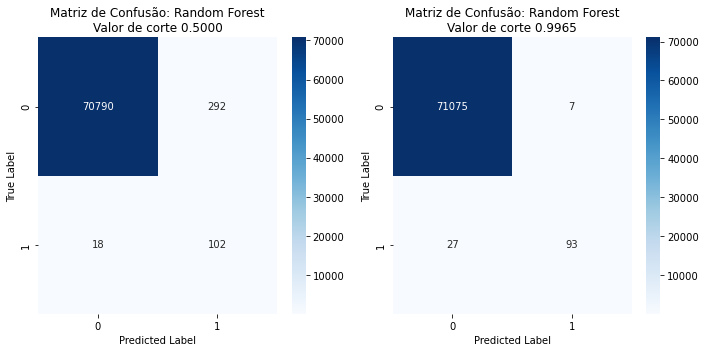

In [46]:
# Melhor Thrseshold
fscore = (2 * precision * recall) / (precision + recall)
idx = np.argmax(fscore)
best_thr=threshold[idx]
precision[idx]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

thresholds_list = [0.5, best_thr]

print('As matrizes podem ser interpretadas da seguinte forma:\n')

for thr,ax in zip(thresholds_list, axs.ravel()):
      y_pred = np.where(y_pred_oversmp_proba> thr, 1, 0)
      
      cf_mtx = confusion_matrix(y_test,y_pred)
      
      tn, fp, fn, tp = cf_mtx.ravel()
      print("Para o valor de corte igual a {:.4f}".format(thr))
      print( '{:.2f}% das fraudes que ocorreram seriam detectadas por esse modelo\
            \n{:.2f}% das transações seriam bloqueadas injustamente(transações normais classificadas como fraude)\n'\
            .format(tp/(tp+fn)*100, fp/(fp+tn)*100) )
      
      cf_mtx = sns.heatmap(cf_mtx, cmap="Blues", annot = True, fmt='g', ax=ax)
      cf_mtx.set(xlabel="Predicted Label", ylabel ="True Label", title="Matriz de Confusão: Random Forest\nValor de corte {:.4f}".format(thr))

fig.tight_layout()
plt.show()

Notamos que com um balanceamento nos dados feito por oversampling o modelo continua desbalanceado. Esse fator por si só não é suficiente para eliminar o tratamento.

Porém, a proporção entre recall e especificidade é muito semelhante nas duas abordagens, o que não traz melhorias para nosso objetivo. Além disso, o custo operacional é maior quanto maior for a base.

Track record:

Undersampl - Rand Forest

* 0.5000: 89.17% detectadas 1.63% bloqueadas 
* 0.9569: 79.17% detectadas 0.02% bloqueadas

SMOTE - Rand Forest
* 0.5000 : 85.00% detectadas 0.08% bloqueadas injustamente
* 0.8600 : 75.83%  detectadas 0.01% bloqueadas

XGBoost

<a id='conclusao'></a>
## Conclusão

* No tratamento de dados, foi suficiente a normalização das colunas 'Amount' e 'Time'. Os outliers se mostraram mais relevantes para melhorar a performance que o contrário e as features escolhidas para treino foram aquelas que apresentaram mais de 0.7 de correlação Spearman com a classe.


* Por ser um problema com uma base extremamente desbalanceada, o melhor método para correção dessa característica foi o Undersampling em uma proporção 60-50, o que aumenta o número de dados em relação a uma proporção de 50-50, mas sem comprometer o balanceamento. Este último foi mensurado com o Brier Score estratificado. Contudo, ainda se tem uma perda grande em relação ao tamanho da base inicial.


* Os classificadores perfomam de forma muito parecida se comparamos somente o F1 Score, mas o Random Forest se destaca quando avaliamos a performance sobre o teste comparando a PR AUC de cada modelo, por esse motivo Random Forest é o modelo escolhido. 


* Visando aumentar a detecção de fraudes, recomendo o uso do threshold=0.5. Entendo que vale o foco na detecção de fraudes em prol do bloqueio de transações que não são fraudes, pois o custo operacional e indireto (satisfação do cliente) são menores do que uma fraude não detectada. O compromisso entre esses dois fatores pode ser aberto a discussão.


   
   
  
  
   
   
   
   
--------------------------------------------------------------------------------------------------------------------------------

*Track record:  balanceamento=1 ; correlacao=0.7 ;COM outliers ; F1=0.9434; PRAUC=0.7561* 89.17% detectadas 2.24% bloqueadas

*Track record:  balanceamento=1.2 ; correlacao=0.7 ;COM outliers ; F1=0.9389 PRAUC=0.7659* 89.17% detectadas 1.63% bloqueadas

*Track record:  balanceamento=1.5 ; correlacao=0.7 ;COM outliers ; F1=0.9329 PRAUC=0.7652*

*Track record:  balanceamento=2 ; correlacao=0.7 ;COM outliers ; F1=0.9334 PRAUC=0.7551*

*Track record:  balanceamento=1.2 ; correlacao=0.6 ;COM outliers ; F1=0.9283 PRAUC=0.7872* 86.67% detectadas 0.86% 

*Track record:  balanceamento=1.2 ; correlacao=0.5 ;COM outliers ; F1=0.9285 PRAUC=0.7880* 85.83% detectadas 0.53% 

*Track record:  balanceamento=1.2 ; correlacao=0.6 ;SEM outliers 1.8; F1=0.915 PRAUC=0.77* 87.50% detectadas 1.06% bloqueadas
